In [2]:
import torchvision

In [5]:
??torchvision.datasets.MNIST

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms

In [7]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose(
    [transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(train_set, batch_size=16)


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw
Processing...


../torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Done!


In [8]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [9]:
len(train_set), len(train_loader)

(60000, 3750)

In [10]:
train_set.train_labels

/usr/local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
train_set.train_labels.bincount()

/usr/local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [12]:
sample = next(iter(train_set))

In [13]:
len(sample)

2

In [14]:
image, label = sample

In [15]:
image.shape

torch.Size([1, 28, 28])

In [17]:
label

9

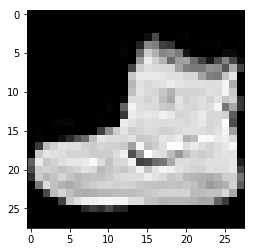

In [20]:
plt.imshow(image.squeeze(), cmap='gray')
plt.show()

In [21]:
batch = next(iter(train_loader))
images, labels = batch

In [22]:
images.shape

torch.Size([16, 1, 28, 28])

In [23]:
labels.shape

torch.Size([16])

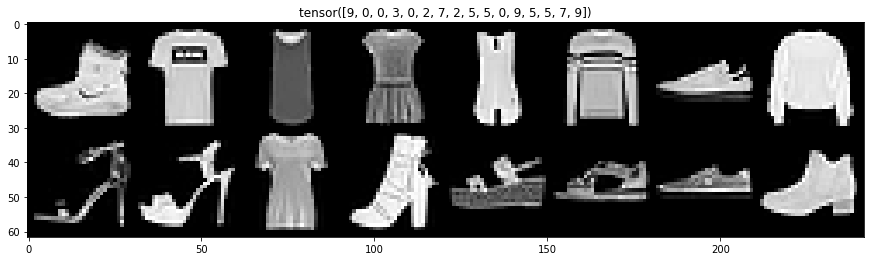

In [29]:
grid = torchvision.utils.make_grid(images, nrow=8)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
plt.title(labels)
plt.show()

In [30]:
??np.transpose

In [44]:
import torch.nn as nn
import torch.nn.functional as F

In [45]:
class Network(nn.Module):
    def __init__(self):
        #super(Network, self).__init__()
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        ## implement forward pass
        t = t
        
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        
        t = self.fc2(t)
        t = F.relu(t)
        
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        
        return t

In [46]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [36]:
class A:
    def __init__(self, a, b):
        print ('params to A', a, b)
        self.a = a
        self.b = b
    def abc(self):
        print (self.a, self.b, 'A')
        
class B(A):
    def __init__(self, a,b,c):        
        super().__init__(a,b)
        print ('params to B', a,b,c)
        
class C(A):
    def __init__(self, a,b,c, d):        
        super(C, self).__init__(a,b)
        print ('params to C', a,b,c, d)
b = B(1,2,3)
print()
c = C(1,2,3,4)

params to A 1 2
params to B 1 2 3

params to A 1 2
params to C 1 2 3 4


In [42]:
for param in network.parameters():
    print (param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [43]:
for name, param in network.named_parameters():
    print (name, ' ::' , param.shape)

conv1.weight  :: torch.Size([6, 1, 5, 5])
conv1.bias  :: torch.Size([6])
conv2.weight  :: torch.Size([12, 6, 5, 5])
conv2.bias  :: torch.Size([12])
fc1.weight  :: torch.Size([120, 192])
fc1.bias  :: torch.Size([120])
fc2.weight  :: torch.Size([60, 120])
fc2.bias  :: torch.Size([60])
out.weight  :: torch.Size([10, 60])
out.bias  :: torch.Size([10])


In [47]:
torch.set_grad_enabled(False)

In [48]:
sample = next(iter(train_set))

In [49]:
image, label = sample
image.shape

torch.Size([1, 28, 28])

In [50]:
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [51]:
pred = network(image.unsqueeze(0))

In [52]:
pred

tensor([[-0.1588,  0.0877,  0.1477, -0.0987,  0.0078, -0.0758, -0.0971, -0.0790, -0.0490, -0.1375]])

In [53]:
pred.argmax(dim=1)

tensor([2])

In [54]:
label

9

In [55]:
F.softmax(pred, dim=1)

tensor([[0.0889, 0.1137, 0.1207, 0.0944, 0.1050, 0.0966, 0.0945, 0.0963, 0.0992, 0.0908]])

In [56]:
F.softmax(pred, dim=1).sum()

tensor(1.)

In [57]:
??torch.utils.data.DataLoader

In [59]:
preds = network(images)

In [60]:
preds.shape

torch.Size([16, 10])

In [62]:
preds

tensor([[-0.1588,  0.0877,  0.1477, -0.0987,  0.0078, -0.0758, -0.0971, -0.0790, -0.0490, -0.1375],
        [-0.1597,  0.0859,  0.1396, -0.1109,  0.0193, -0.0934, -0.0980, -0.0846, -0.0595, -0.1326],
        [-0.1469,  0.0851,  0.1439, -0.1148,  0.0115, -0.0918, -0.0866, -0.0781, -0.0438, -0.1278],
        [-0.1517,  0.0879,  0.1405, -0.1076,  0.0091, -0.0929, -0.0823, -0.0830, -0.0461, -0.1273],
        [-0.1561,  0.0937,  0.1417, -0.1068,  0.0114, -0.0803, -0.0845, -0.0888, -0.0545, -0.1441],
        [-0.1530,  0.0839,  0.1341, -0.1053,  0.0070, -0.0894, -0.1016, -0.0825, -0.0601, -0.1212],
        [-0.1529,  0.0950,  0.1463, -0.1124,  0.0057, -0.0854, -0.1016, -0.0747, -0.0412, -0.1408],
        [-0.1606,  0.0916,  0.1409, -0.1000,  0.0117, -0.0811, -0.1043, -0.0878, -0.0672, -0.1338],
        [-0.1486,  0.0812,  0.1499, -0.1156,  0.0118, -0.0849, -0.0861, -0.0726, -0.0451, -0.1380],
        [-0.1632,  0.0825,  0.1413, -0.0956,  0.0145, -0.0843, -0.0790, -0.0686, -0.0430, -0.1229],


In [65]:
preds.argmax(dim=1)

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])

In [68]:
preds.argmax(dim=1).eq(labels).sum().item()

2

In [69]:
import torch.optim as optim
torch.set_grad_enabled(True)

In [70]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item()

2.3459696769714355

In [72]:
print (network.conv1.weight.grad)

None


In [73]:
loss.backward()

In [75]:
print (network.conv1.weight.grad.shape), print (network.conv1.weight.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6, 1, 5, 5])


(None, None)

In [76]:
optimizer = optim.Adam(network.parameters(), lr=0.01)

In [77]:
loss.item()

2.3459696769714355

In [78]:
preds.argmax(dim=1).eq(labels).sum().item()

2

In [79]:
optimizer.step() # update weights

In [80]:
preds = network(images)
loss = F.cross_entropy(preds, labels)

In [81]:
loss.item()

2.236804246902466

In [82]:
preds.argmax(dim=1).eq(labels).sum().item()

2

In [85]:
for epoch in range(5):
    total_loss = 0
    total_correct = 0

    for batch in train_loader:
        images, labels = batch

        preds = network(images)
        loss = F.cross_entropy(preds, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss+=loss.item()
        total_correct+=preds.argmax(dim=1).eq(labels).sum().item()
    print (epoch, total_loss, total_correct)

0 1868.352437166497 49036
1 1853.5194092839956 49171
2 1821.567299183458 49404
3 1826.5868755690753 49425
4 1818.6199819911271 49525


In [84]:
total_correct/len(train_set)

0.7652

In [86]:
total_correct/len(train_set)

0.8254166666666667

In [87]:
len(train_set), len(train_set.targets)

(60000, 60000)

In [88]:
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch
        
        preds = model(images)
        all_preds = torch.cat((all_preds, preds), dim=0)
        
    return all_preds

In [89]:
prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=5000)
train_preds = get_all_preds(network, prediction_loader)

In [90]:
train_preds.shape

torch.Size([60000, 10])

In [91]:
train_preds.requires_grad

True

In [93]:
print (train_preds.grad)

None


In [94]:
print (train_preds.grad_fn)

In [95]:
with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=5000)
    train_preds = get_all_preds(network, prediction_loader)

In [96]:
train_preds.requires_grad

False

In [97]:
total_correct/len(train_set)

0.8254166666666667

In [98]:
print (train_preds.grad_fn)

None


In [99]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [100]:
train_preds.argmax(dim=1)

tensor([9, 0, 3,  ..., 3, 0, 5])

In [102]:
stacked = torch.stack((train_set.targets, train_preds.argmax(dim=1)), dim=1)

In [103]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 3],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [104]:
cmt = torch.zeros(10, 10, dtype=torch.int64)

In [106]:
for p in stacked:
    j, k = p.tolist()
    cmt[j,k] = cmt[j,k]+1

In [107]:
cmt

tensor([[5254,   11,  131,  191,   16,    3,  344,    0,   50,    0],
        [  47, 5772,   15,   88,   10,    0,   51,    0,   17,    0],
        [  35,    2, 4436,   34,  940,    0,  513,    0,   40,    0],
        [ 286,   76,   28, 5077,  366,    2,  156,    0,    7,    2],
        [  15,   14,  774,  190, 4657,    1,  329,    0,   20,    0],
        [   0,    0,    2,    0,    0, 5387,    0,  476,   36,   99],
        [1577,   11, 1099,  141,  804,    1, 2267,    0,  100,    0],
        [   0,    0,    0,    0,    0,   26,    0, 5846,   14,  114],
        [  25,    2,   97,   36,   28,   21,   69,   19, 5698,    5],
        [   0,    0,    2,    0,    0,   32,    1,  314,   13, 5638]])

In [108]:
cmt.tolist()

[[5254, 11, 131, 191, 16, 3, 344, 0, 50, 0],
 [47, 5772, 15, 88, 10, 0, 51, 0, 17, 0],
 [35, 2, 4436, 34, 940, 0, 513, 0, 40, 0],
 [286, 76, 28, 5077, 366, 2, 156, 0, 7, 2],
 [15, 14, 774, 190, 4657, 1, 329, 0, 20, 0],
 [0, 0, 2, 0, 0, 5387, 0, 476, 36, 99],
 [1577, 11, 1099, 141, 804, 1, 2267, 0, 100, 0],
 [0, 0, 0, 0, 0, 26, 0, 5846, 14, 114],
 [25, 2, 97, 36, 28, 21, 69, 19, 5698, 5],
 [0, 0, 2, 0, 0, 32, 1, 314, 13, 5638]]

In [ ]:
# unsqueeze and expand_dims do the same thing